# Przygotowanie i obróbka danych o zanieczyszczeniu powietrza w Krakowie

 Źródło: http://powietrze.gios.gov.pl/pjp/archives

In [4]:
!pip install xlrd 

In [1]:
import pandas as pd 
import numpy as np

data_2018 = pd.read_excel("2018_PM10_1g.xlsx")
data_2017 = pd.read_excel("2017_PM10_1g.xlsx")

In [2]:
data = pd.concat([data_2017, data_2018])

In [3]:
data = data.set_index("timestamp")

In [4]:
data.head()

,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g,MpKrakBulwar-PM10-1g,MpKrakDietla-PM10-1g,MpKrakOsPias-PM10-1g,MpKrakTelime-PM10-1g,MpKrakWadow-PM10-1g,MpKrakZloRog-PM10-1g
timestamp,,,,,,,,
2017-01-01 01:00:00,213.733,392.428,188.308,236.818,141.186,280.933,NaN,NaN
2017-01-01 02:00:00,213.868,258.667,193.168,179.874,111.482,175.998,NaN,NaN
2017-01-01 03:00:00,221.923,211.760,175.267,185.302,116.691,153.393,NaN,NaN
2017-01-01 04:00:00,244.690,191.820,179.422,190.668,121.213,137.465,NaN,NaN
2017-01-01 05:00:00,224.673,187.663,158.296,179.161,112.461,143.826,NaN,NaN


In [5]:
krk_colums = [col_name for col_name in data.columns if 'krak' in col_name.lower()]
krk_colums

['MpKrakAlKras-PM10-1g',
 'MpKrakBujaka-PM10-1g',
 'MpKrakBulwar-PM10-1g',
 'MpKrakDietla-PM10-1g',
 'MpKrakOsPias-PM10-1g',
 'MpKrakTelime-PM10-1g',
 'MpKrakWadow-PM10-1g',
 'MpKrakZloRog-PM10-1g']

### W dalszym etapie analizowane będą dane dla stacji badawczech z Al. Krasickiego i ul. Bujaka w Krakowie. 

In [6]:
chosen_stations = ['MpKrakAlKras-PM10-1g', 'MpKrakBujaka-PM10-1g']

In [7]:
df_krk_chosen = data.loc[:, chosen_stations]
df_krk_chosen.head()

,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g
timestamp,,
2017-01-01 01:00:00,213.733,392.428
2017-01-01 02:00:00,213.868,258.667
2017-01-01 03:00:00,221.923,211.760
2017-01-01 04:00:00,244.690,191.820
2017-01-01 05:00:00,224.673,187.663


#### Analiza luk w danych: 

In [20]:
def get_gaps_table(df_gap_index):
    no_gap = 1
    len_gap = 1
    prev_id = 0
    no_gaps = []
    len_gaps = []
    start_ids = []
    end_ids = []

    for i in index:
        if (prev_id+1==df_index.index(i)):
            len_gap += 1
        else:
            rec = {}
    #         print(len_gap, no_gap, prev_id)
            no_gaps.append(no_gap)
            len_gaps.append(len_gap)
            start_ids.append(prev_id-len_gap)
            end_ids.append(prev_id)
            len_gap=1
            no_gap += 1

        prev_id = df_index.index(i)

    df_gaps = pd.DataFrame().from_dict({'no_gaps':no_gaps, 'len_gaps':len_gaps, 'start_ids':start_ids, 'end_ids':end_ids})
    return df_gaps

Data Gaps stats for station: MpKrakAlKras-PM10-1g


,len_gaps,start_ids,end_ids
count,16.000000,16.000000,16.000000
mean,10.750000,7954.125000,7964.875000
std,22.758149,4842.717761,4852.218529
min,1.000000,-1.000000,0.000000
25%,1.000000,5293.250000,5295.000000
50%,2.000000,5922.500000,5929.000000
75%,3.750000,12172.750000,12192.000000
max,74.000000,15067.000000,15073.000000


,no_gaps,len_gaps,start_ids,end_ids
0,1,1,-1,0
1,2,1,1578,1579
2,3,1,2496,2497
3,4,1,5291,5292
4,5,2,5294,5296


Data Gaps stats for station: MpKrakBujaka-PM10-1g


,len_gaps,start_ids,end_ids
count,99.000000,99.000000,99.000000
mean,9.111111,7847.171717,7856.282828
std,16.306308,3877.373959,3881.354072
min,1.000000,-1.000000,0.000000
25%,1.000000,6337.500000,6339.000000
50%,2.000000,6876.000000,6878.000000
75%,6.000000,9802.500000,9803.500000
max,79.000000,15914.000000,15993.000000


,no_gaps,len_gaps,start_ids,end_ids
0,1,1,-1,0
1,2,1,231,232
2,3,1,429,430
3,4,1,1139,1140
4,5,30,1348,1378


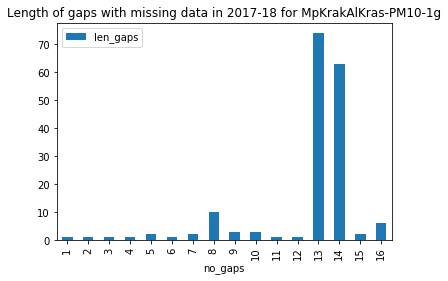

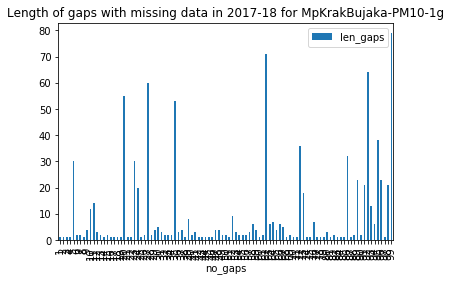

In [25]:
from IPython.display import display

for station in chosen_stations:
    index = df_krk_chosen.reset_index()[station].index[df_krk_chosen.reset_index()[station].isna()]
    df_index = df_krk_chosen.reset_index().index.values.tolist()
    df_gaps = get_gaps_table(df_index)
    print("Data Gaps stats for station: {}".format(station))
    display(df_gaps.set_index('no_gaps').describe())
    display(df_gaps.head())
    df_gaps.plot(x = 'no_gaps', y=['len_gaps'], kind='bar', title = "Length of gaps with missing data in 2017-18 for {}".format(station))

In [28]:
df_krk_chosen.isna().sum()

MpKrakAlKras-PM10-1g    191
MpKrakBujaka-PM10-1g    903
dtype: int64

**NOTE:** Statystyki długości trwania przerw w danych wskazują dla obu badanych stacji, że mediana długości przerw wynosi 2 godziny. Dlatego w kolejnym kroku dla kazdej z luk w danych <= 2 godziny puste wskazania zostaną interpolowane. 

In [30]:
df_krk_chosen.interpolate(limit=2, inplace=True)
df_krk_chosen.isna().sum()

MpKrakAlKras-PM10-1g    153
MpKrakBujaka-PM10-1g    658
dtype: int64

In [31]:
df_krk_chosen.to_csv("2017-2018_KrkAlKras_Bujaka_preprocessed_all_timestapms.csv")

W przypadku posiadanych danych interpolacja dłuższych przerw jak kilka godzin nie jest poprawna - godzinowe dane zmieniają się nieregularnie. Z tego powodu zdecydowano o usunięciu danych dla próbek, dla których dane nie zostały zapisane

## Usuwanie rekordow nieznanych 

In [32]:
df_krk_chosen = pd.read_csv("2017-2018_KrkAlKras_Bujaka_preprocessed_all_timestapms.csv")

In [39]:
# df_krk_chosen_dropped = df_krk_chosen.dropna()
# print(df_krk_chosen_dropped.describe())
# df_krk_chosen_dropped.isna().sum()

       MpKrakAlKras-PM10-1g  MpKrakBujaka-PM10-1g
count          16670.000000          16670.000000
mean              56.371797             43.434043
std               46.746226             44.822593
min                2.885020              3.000000
25%               27.475125             18.596225
50%               42.260900             28.970550
75%               68.530800             49.214275
max              415.450000            480.523000


MpKrakAlKras-PM10-1g    0
MpKrakBujaka-PM10-1g    0
dtype: int64

# Podział na dwa pliki (po jednym na stacje)

In [56]:
df_krk_chosen = pd.read_csv("2017-2018_KrkAlKras_Bujaka_preprocessed_all_timestapms.csv")
# df_krk_chosen['Przewidywania'] = [[0, 0, 0 ]]*len(df_krk_chosen)
df_krk_chosen.head()

,timestamp,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g
0,2017-01-01 01:00:00,213.733,392.428
1,2017-01-01 02:00:00,213.868,258.667
2,2017-01-01 03:00:00,221.923,211.760
3,2017-01-01 04:00:00,244.690,191.820
4,2017-01-01 05:00:00,224.673,187.663


In [60]:
for station in chosen_stations:
    fn = "2017-2018_single_{}_preprocessed_all_timestapms.csv".format(station.split('-')[0])
    df_krk_chosen.loc[:, ['timestamp',station]].to_csv(fn, index=False)
    print("Saved to ", fn)

Saved to  2017-2018_single_MpKrakAlKras_preprocessed_all_timestapms.csv
Saved to  2017-2018_single_MpKrakBujaka_preprocessed_all_timestapms.csv


In [80]:
#check
df= pd.read_csv("2017-2018_single_MpKrakBujaka_preprocessed_all_timestapms.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace = True)
df.head(2)

,MpKrakBujaka-PM10-1g
timestamp,
2017-01-01 01:00:00,392.428
2017-01-01 02:00:00,258.667


## Tworzenie nowych kolumn z prognozami za 3, 8 i 12 h. 

In [ ]:
from datetime import datetime, timedelta

In [102]:
def get_future_values(df, hours):  
    forecast_list = []
    col_name = df.columns[0]
    for tmstp_index in df.index:
        try:
            value = df.loc[tmstp_index+timedelta(hours=hours), col_name] if tmstp_index <df.index[-hours] else None
        except KeyError as e:
            value = None
        forecast_list.append(value)
    return forecast_list

In [113]:

for station in chosen_stations:
    fn_read = "2017-2018_single_{}_preprocessed_all_timestapms.csv".format(station.split('-')[0])
    df= pd.read_csv(fn_read)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace = True)
    
    col_name_template = 'PM10_Forecast_{}h'
    for h in (3, 8, 12):
        df[col_name_template.format(h)] =  get_future_values(df, h)
    
    fn_out = "2017-2018_single_{}_all_timestapms_with_forecast3_8_12h.csv".format(station.split('-')[0])
    df.to_csv(fn_out)
    print("Saved", fn_out)

Saved 2017-2018_single_MpKrakAlKras_all_timestapms_with_forecast3_8_12h.csv
Saved 2017-2018_single_MpKrakBujaka_all_timestapms_with_forecast3_8_12h.csv


# Łączenie danych pogodowych w jeden plik 2017-2018

In [114]:
from datetime import date
def to_date(filename):
    return date(year=int(file[:4]), month=int(file[4:6]), day = int(file[6:8]))

In [115]:
main_folder_path = "./weather2017-19 ver2"
years = ['2017', '2018']

In [116]:
import os

weather_df = pd.DataFrame()
x_dirs = [x[0] for x in os.walk(main_folder_path) if '2019' not in x[0]]
import os
for path in x_dirs:
    for file in os.listdir(path):
        if file.endswith(".csv"):
            daily_file_path = os.path.join(path, file)
            daily_df =  pd.read_csv(daily_file_path)
#             if (len(daily_df) not in [48]): print(len(daily_df), daily_file_path)
            daily_df['date'] = [str(to_date(file))]*len(daily_df)
            if len(weather_df) <= 0: 
                weather_df = daily_df
            else:
                weather_df = pd.concat([weather_df, daily_df])

In [117]:
weather_df['timestamp'] = pd.to_datetime(weather_df['date'] + ' ' + weather_df['Hour'])
weather_df.drop(columns=['date', 'Hour'], inplace=True)
weather_df.set_index('timestamp', inplace=True)

In [118]:
weather_df.loc[:, 'Humidity'].fillna(method = 'bfill', inplace=True)
weather_df.loc[:, 'Barometer'].fillna(method = 'bfill', inplace=True)

In [119]:
weather_df.head()

,Temp,Weather,Wind,Direction (degrees),Humidity,Barometer,Visibility
timestamp,,,,,,,
2017-01-01 00:00:00,-6C,Ice fog.,1 m/s,0,93%,1025 mbar,3km
2017-01-01 00:30:00,-7C,Ice fog.,1 m/s,0,93%,1024 mbar,3km
2017-01-01 01:00:00,-6C,Ice fog.,1 m/s,0,93%,1024 mbar,3km
2017-01-01 01:30:00,-7C,Ice fog.,1 m/s,0,93%,1024 mbar,3km
2017-01-01 02:00:00,-7C,Ice fog.,2 m/s,190,93%,1024 mbar,3km


In [51]:
series = weather_df.loc[:, 'Visibility']
series.index[series.isna()]

DatetimeIndex(['2017-01-02 10:00:00', '2017-01-02 10:30:00',
               '2017-01-02 11:00:00', '2017-01-02 11:30:00',
               '2017-01-02 12:00:00', '2017-01-02 12:30:00',
               '2017-01-02 13:00:00', '2017-01-03 11:00:00',
               '2017-01-03 11:30:00', '2017-01-03 13:00:00',
               ...
               '2018-12-31 18:00:00', '2018-12-31 18:30:00',
               '2018-12-31 19:00:00', '2018-12-31 19:30:00',
               '2018-12-31 20:00:00', '2018-12-31 20:30:00',
               '2018-12-31 21:00:00', '2018-12-31 21:30:00',
               '2018-12-31 22:00:00', '2018-12-31 22:30:00'],
              dtype='datetime64[ns]', name='timestamp', length=15952, freq=None)

In [121]:
weather_df.to_csv('2017-2018_weather_partly_preprocessed_with_units.csv')

# Usuwanie jednostek

Z powodu dużej ilości braku danych na temat widocznosci (prawie 50% danych jest NaN -> nieznane) kolumna została pominieta w dalszych analizach

In [122]:
weather_df = pd.read_csv('2017-2018_weather_partly_preprocessed_with_units.csv')

In [123]:
print(len(weather_df))
weather_df.head()

34518


,timestamp,Temp,Weather,Wind,Direction (degrees),Humidity,Barometer,Visibility
0,2017-01-01 00:00:00,-6C,Ice fog.,1 m/s,0,93%,1025 mbar,3km
1,2017-01-01 00:30:00,-7C,Ice fog.,1 m/s,0,93%,1024 mbar,3km
2,2017-01-01 01:00:00,-6C,Ice fog.,1 m/s,0,93%,1024 mbar,3km
3,2017-01-01 01:30:00,-7C,Ice fog.,1 m/s,0,93%,1024 mbar,3km
4,2017-01-01 02:00:00,-7C,Ice fog.,2 m/s,190,93%,1024 mbar,3km


In [124]:
weather_df_no_units = pd.DataFrame()
weather_df_no_units['timestamp'] = weather_df['timestamp']
weather_df_no_units['Weather'] = weather_df['Weather']
weather_df_no_units['Direction(deg)'] = weather_df['Direction (degrees)']
weather_df_no_units.set_index('timestamp', inplace=True)

In [125]:
temp_list = list(weather_df.loc[:, 'Temp'])

In [126]:
weather_df_no_units['Temp(C)'] = [int(temp.replace('C', '')) for temp in temp_list]

In [127]:
wind_list = list(weather_df.loc[:, 'Wind'])

weather_df_no_units['Wind(m/s)'] = [0 if wind=='No wind' else int(wind.replace('m/s', '')) for wind in wind_list]

In [128]:
unit_list = list(weather_df.loc[:, 'Humidity'])
weather_df_no_units['Humidity'] = [int(unit.replace('%', ''))/100 for unit in unit_list if '%' in unit ]

In [129]:
unit_list = list(weather_df.loc[:, 'Barometer'])
weather_df_no_units['Barometer(mbar)'] = [int(unit.replace('mbar', ''))/100 for unit in unit_list if 'mbar' in unit ]

In [130]:
print(len(weather_df_no_units))
weather_df_no_units.head()

34518


,Weather,Direction(deg),Temp(C),Wind(m/s),Humidity,Barometer(mbar)
timestamp,,,,,,
2017-01-01 00:00:00,Ice fog.,0,-6,1,0.93,10.25
2017-01-01 00:30:00,Ice fog.,0,-7,1,0.93,10.24
2017-01-01 01:00:00,Ice fog.,0,-6,1,0.93,10.24
2017-01-01 01:30:00,Ice fog.,0,-7,1,0.93,10.24
2017-01-01 02:00:00,Ice fog.,190,-7,2,0.93,10.24


In [131]:
weather_df_no_units.to_csv('2017-2018_weather_preprocessed.csv')

# Łączenie danych pogodowych i danych jakosći powietrza

In [153]:
weather_df_no_units = pd.read_csv('2017-2018_weather_preprocessed.csv').set_index('timestamp')

for station in chosen_stations:
    df_krk= pd.read_csv("2017-2018_single_{}_all_timestapms_with_forecast3_8_12h.csv".format(station.split('-')[0])).set_index('timestamp')
    data_joined = df_krk.join(weather_df_no_units, how='left')
    
    series = data_joined['Weather']
    index = series.index[series.isna()]
    
    wheather_columns = weather_df_no_units.columns.to_list()
    for tmstmp in index:
        #copy from next half-hour
        half_next_tmstmp = str(pd.to_datetime(tmstmp)+timedelta(minutes=30))
        try:
            data_joined.at[tmstmp, 'Weather':'Barometer(mbar)'] = weather_df_no_units.loc[half_next_tmstmp].tolist()
        except KeyError:
            #copy from prev half-hour
            half_prev_tmstmp = str(pd.to_datetime(tmstmp)-timedelta(minutes=30))
            try:
                data_joined.at[tmstmp, 'Weather':'Barometer(mbar)'] = weather_df_no_units.loc[half_prev_tmstmp].tolist()
            except KeyError:
                #copy from next hour
                next_tmstmp = str(pd.to_datetime(tmstmp)+timedelta(minutes=60))
                try:
                    data_joined.at[tmstmp, 'Weather':'Barometer(mbar)'] = weather_df_no_units.loc[next_tmstmp].tolist()
                except KeyError:
                     #copy from prev hour
                    prev_tmstmp = str(pd.to_datetime(tmstmp)-timedelta(minutes=60))
                    try:
                        data_joined.at[tmstmp, 'Weather':'Barometer(mbar)'] = weather_df_no_units.loc[prev_tmstmp].tolist()
                    except KeyError:
                        print("KeyError for tmstmp = {} and half_next_tmstmp set as {}".format(tmstmp, half_next_tmstmp))
                        
    data_joined.sort_index(inplace=True)

    columns_order = [station, 'Weather', 'Temp(C)','Wind(m/s)', 'Direction(deg)',
    'Humidity', 'Barometer(mbar)', 'PM10_Forecast_3h', 'PM10_Forecast_8h',
   'PM10_Forecast_12h']

    data_joined = data_joined.reindex(columns_order, axis=1)
    data_joined.head()


    fn_out = "2017-2018_single_{}_with_NONES_with_forecast3_8_12h.csv".format(station.split('-')[0])
    data_joined.to_csv(fn_out)
    print("Saved ", station)


Saved  MpKrakAlKras-PM10-1g
Saved  MpKrakBujaka-PM10-1g
